,make,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,audi,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


1.Read in the data from data/cars.csv and call it "df". This is a slightly smaller, cleaned dataset from this original dataset:

https://archive.ics.uci.edu/ml/datasets/automobile

In [8]:
#insert 1
df = pd.read_csv('data/cars.csv')
df = df.drop(columns=['Unnamed: 0'])

2.Create a frequency chart for "make" in descending order of frequency. Hint: use value_counts.

In [9]:
#insert 2
# descending means getting smaller right
df['make'].value_counts()
df.value_counts('make')

make
toyota           32
nissan           18
mazda            13
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       2
isuzu             2
mercury           1
dtype: int64

3.Drop the "make" column from the dataframe, replacing it with one-hot columns corresponding to each make. This updated dataframe should be called "new_df" and it should contain 35 columns.

In [10]:
#insert 3
one_hot = pd.get_dummies(df['make'])
df = df.drop('make', axis = 1)
new_df = df.join(one_hot)
new_df.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,...,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,0,0,0
1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,...,0,0,0,0,0,0,0,0,0,0
2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,...,0,0,0,0,0,0,0,0,0,0
3,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,...,0,0,0,0,0,0,0,0,0,0
4,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
new_df.columns

Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price', 'alfa-romero', 'audi', 'bmw',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot',
       'plymouth', 'porsche', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

4.Let's do something wrong and see what happens. Let X correspond to all of the input data in new_df (including price) and let y correspond to the target variable (price). Run a linear regression on the entire dataset and print both R^2 and the adjusted R^2. Why do you get what you get?

In [39]:
#insert 4
x = new_df
y = df['price']

model = LinearRegression()
model.fit(x, y)
print('R-squared', model.score(x,y))
print(f"Adjusted R^2: {1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)}")

R-squared 1.0
Adjusted R^2: 1.0


5.In the cell below, correct your mistake above in order and run a linear regression again. Print both R^2 and the adjusted R^2.

In [40]:
#insert 5
x = new_df.drop(columns='price')
y = df['price']

model = LinearRegression()
model.fit(x, y)
print('R-squared', model.score(x,y))
print(f"Adjusted R^2: {1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)}")

R-squared 0.9437778143250787
Adjusted R^2: 0.9317554601555986


6.Sort the correlations of each variable with respect to price in decending order to view which variables are most and least influential. Are there any surprises?

In [41]:
#insert 6
new_df.corr()['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.888942
curb-weight          0.835736
horsepower           0.811084
width                0.755783
length               0.695747
wheel-base           0.590389
bore                 0.547171
mercedes-benz        0.525156
jaguar               0.332179
bmw                  0.331359
porsche              0.326952
volvo                0.146575
height               0.140256
audi                 0.102280
stroke               0.094849
compression-ratio    0.069563
peugot               0.068240
saab                 0.043831
alfa-romero          0.041214
mercury              0.029094
isuzu               -0.054858
volkswagen          -0.101012
peak-rpm            -0.104312
mazda               -0.110515
nissan              -0.112382
chevrolet           -0.112624
plymouth            -0.126882
mitsubishi          -0.133295
dodge               -0.147055
subaru              -0.149977
honda               -0.168392
toyota              -0.185413
city-mpg  

7.Read the "Filter Method" section of the article located here:
    
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
    
Use it to create a list of columns called "relevant_features" that contains only the variables whose correlations with price had an absolute value greater than 0.1. 

In [42]:
#insert 7
cor = new_df.corr()
cor_target = abs(cor['price'])
relevant_features = cor_target[cor_target>0.1]
relevant_features.sort_values(ascending=False)

price            1.000000
engine-size      0.888942
curb-weight      0.835736
horsepower       0.811084
width            0.755783
highway-mpg      0.716089
city-mpg         0.703429
length           0.695747
wheel-base       0.590389
bore             0.547171
mercedes-benz    0.525156
jaguar           0.332179
bmw              0.331359
porsche          0.326952
toyota           0.185413
honda            0.168392
subaru           0.149977
dodge            0.147055
volvo            0.146575
height           0.140256
mitsubishi       0.133295
plymouth         0.126882
chevrolet        0.112624
nissan           0.112382
mazda            0.110515
peak-rpm         0.104312
audi             0.102280
volkswagen       0.101012
Name: price, dtype: float64

8.Run a linear regression again but now only with input corresponding to the relevant features. 

Hint: "X = new_df[relevant_features.index]" is a line that may be helpful.

How does your adjusted R^2 here compare to the adjusted R^2 obtained you obtained above by using all columns except for price as your input?

In [43]:
#insert 8
x = new_df[relevant_features.index].drop(columns='price')
y = new_df['price']

model = LinearRegression()
model.fit(x, y)
print('R-squared', model.score(x,y))
print(f"Adjusted R^2: {1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)}")

R-squared 0.9420681449532273
Adjusted R^2: 0.9326454938311619


9.For the sake of simplicity, reduce our dataset even further to contain only columns whose correlations with price are greater than 0.7 and print the head of the dataset:

In [49]:
#insert 9
# cor = new_df.corr()
# cor_target = abs(cor['price'])
relevant_features = cor_target[cor_target>0.7]
relevant_features.sort_values(ascending=False)

price          1.000000
engine-size    0.888942
curb-weight    0.835736
horsepower     0.811084
width          0.755783
highway-mpg    0.716089
city-mpg       0.703429
Name: price, dtype: float64

10.Run a linear regression model using this reduced input:

In [50]:
#insert 10
x = new_df[relevant_features.index].drop(columns='price')
y = new_df['price']

model = LinearRegression()
model.fit(x, y)
print('R-squared', model.score(x,y))
print(f"Adjusted R^2: {1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)}")

R-squared 0.8280993998884991
Adjusted R^2: 0.8225838726121943


11.Write the equation of the linear regression model. You can do this in markdown or using hashtags.

In [52]:
#insert 11
# y = intercept + coefficient * x
# y = -55214.175571516935 + 635.17378815 * engine-size
# y = -55214.175571516935 + 2.39166552 * curb-weight
# y = -55214.175571516935 + 94.79935492 * horsepower
# y = -55214.175571516935 + 50.71709724 * width
# y = -55214.175571516935 - 96.33155044 * highway-mpg
# y = -55214.175571516935 + 180.45292619 * city-mpg

12.The stats on a school bus are width = 102 inches, curb-weight = 30000 pounds, engine-size = 550, horsepower = 250, city-mpg = 4, highway-mpg = 6. Use model.predict to predict the price of the school bus. Why might you have reservations in using this model to do this?

In [54]:
#insert 12
model.predict([[550,30000,250,102,6,4]])
# the model might not work because school buses has no equipments like normal cars, and is much more extreme than a normal car

array([394898.17852155])

13.Do a sns pair-wise plot of the 6 predictor variables and price.

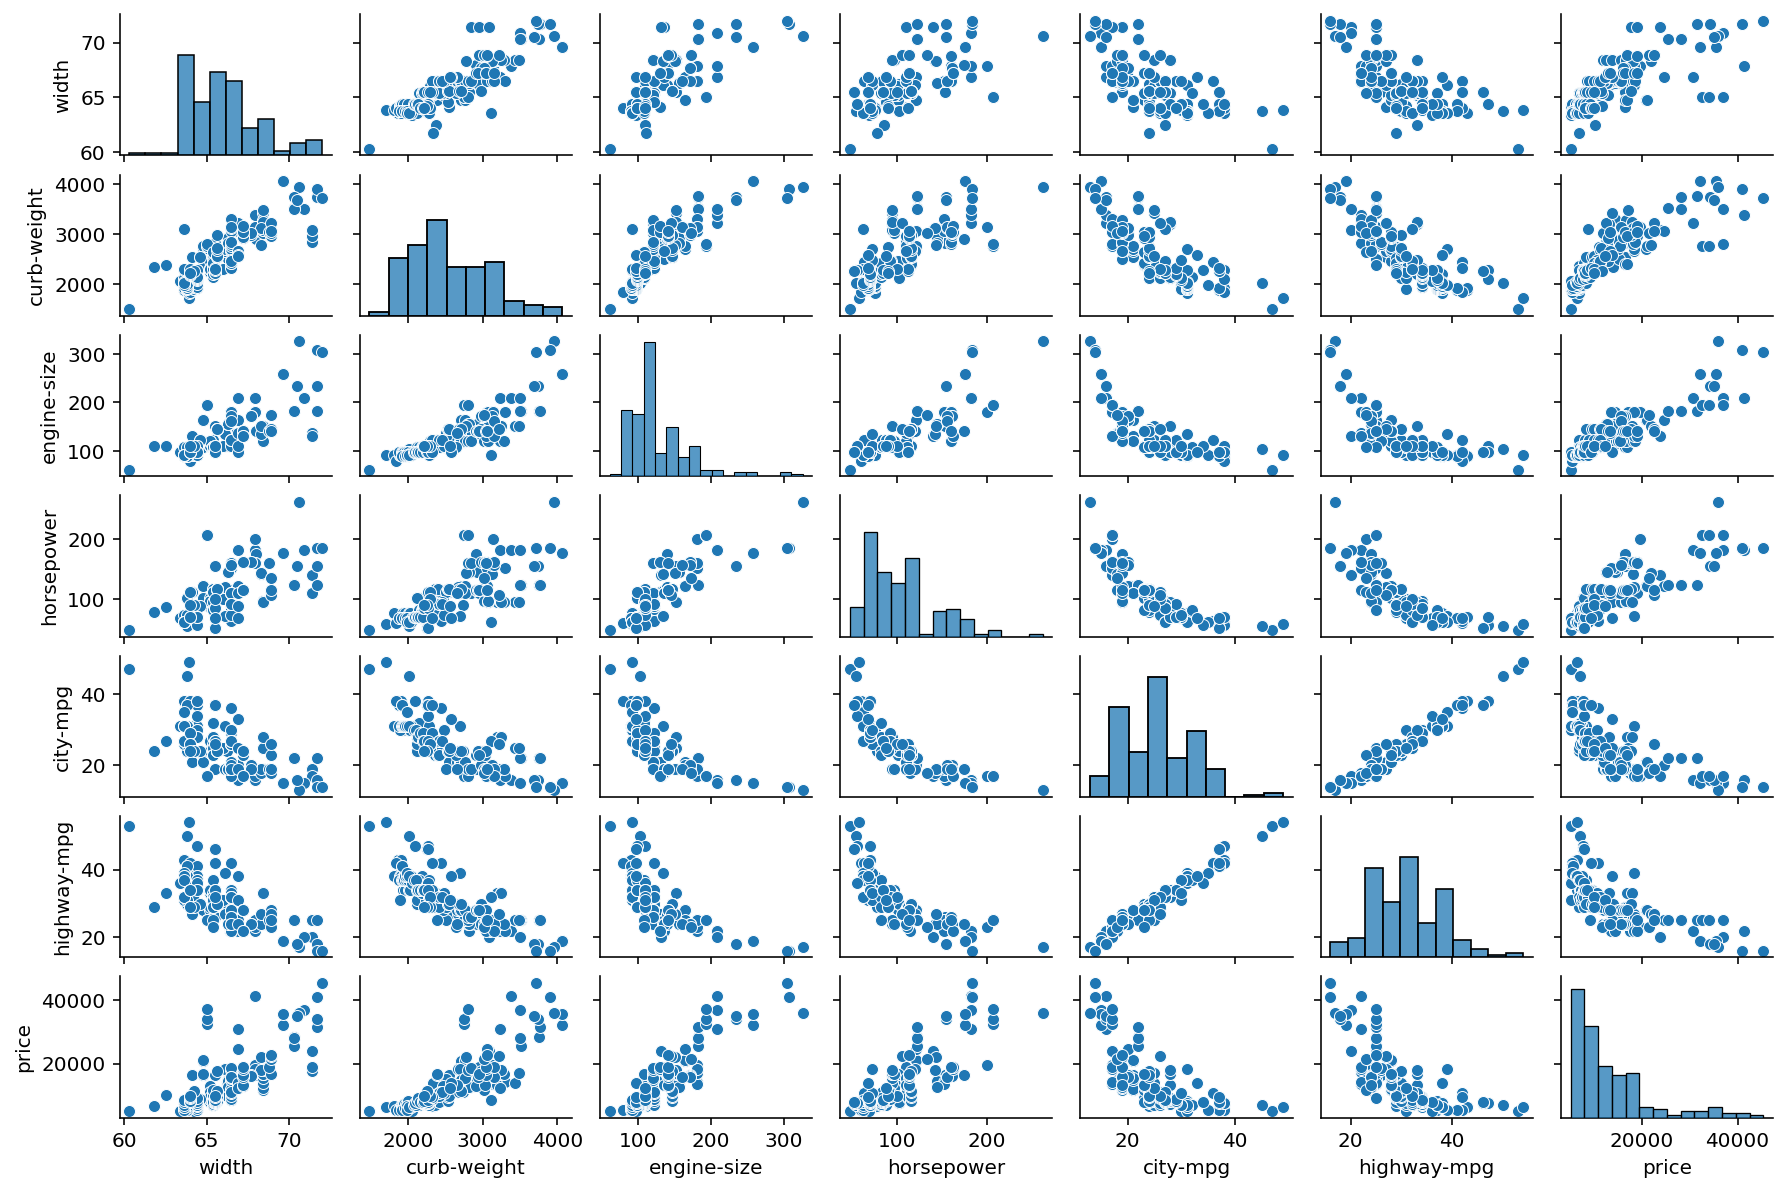

In [57]:
#insert 13
sns.pairplot(new_df[relevant_features.index], height = 1.2, aspect=1.5)

14.We have been sweeping something under the rug...the histograms should appear somewhat normally distributed if we want to use linear regression. The price, engine-size, and horse-power histograms look especially skewed. Create a new dataframe that contains **seven** variables: the original width, curb-weight, city-mpg, and highway-mpg, and the logs of the price, engine-size, and horsepower columns.

Hint: X['log_price'] = np.log(X['price']) is a quick way to make a new column.

In [62]:
#insert 14
log_df = pd.DataFrame()
log_df['log_price'] = np.log(new_df['price'])
log_df['log_engine-size'] = np.log(new_df['engine-size'])
log_df['log_horsepower'] = np.log(new_df['horsepower'])
log_df['width'] = new_df['width']
log_df['curb-weight'] = new_df['curb-weight']
log_df['city-mpg'] = new_df['city-mpg']
log_df['highway-mpg'] = new_df['highway-mpg']
log_df

,log_price,log_engine-size,log_horsepower,width,curb-weight,city-mpg,highway-mpg
0,9.711116,4.867534,4.709530,64.1,2548,21,27
1,9.711116,5.023881,5.036953,65.5,2823,19,26
2,9.543235,4.691348,4.624973,66.2,2337,24,30
3,9.767095,4.912655,4.744932,66.4,2824,18,22
4,9.632335,4.912655,4.700480,66.3,2507,19,25
...,...,...,...,...,...,...,...
189,9.731809,4.948760,4.736198,68.9,2952,23,28
190,9.854560,4.948760,5.075174,68.8,3049,19,25
191,9.975110,5.153292,4.897840,68.9,3012,18,23
192,10.019936,4.976734,4.663439,68.9,3217,26,27


15.Create a new sns-pairplot of this data to verify that the histograms look a bit more normally distributed:

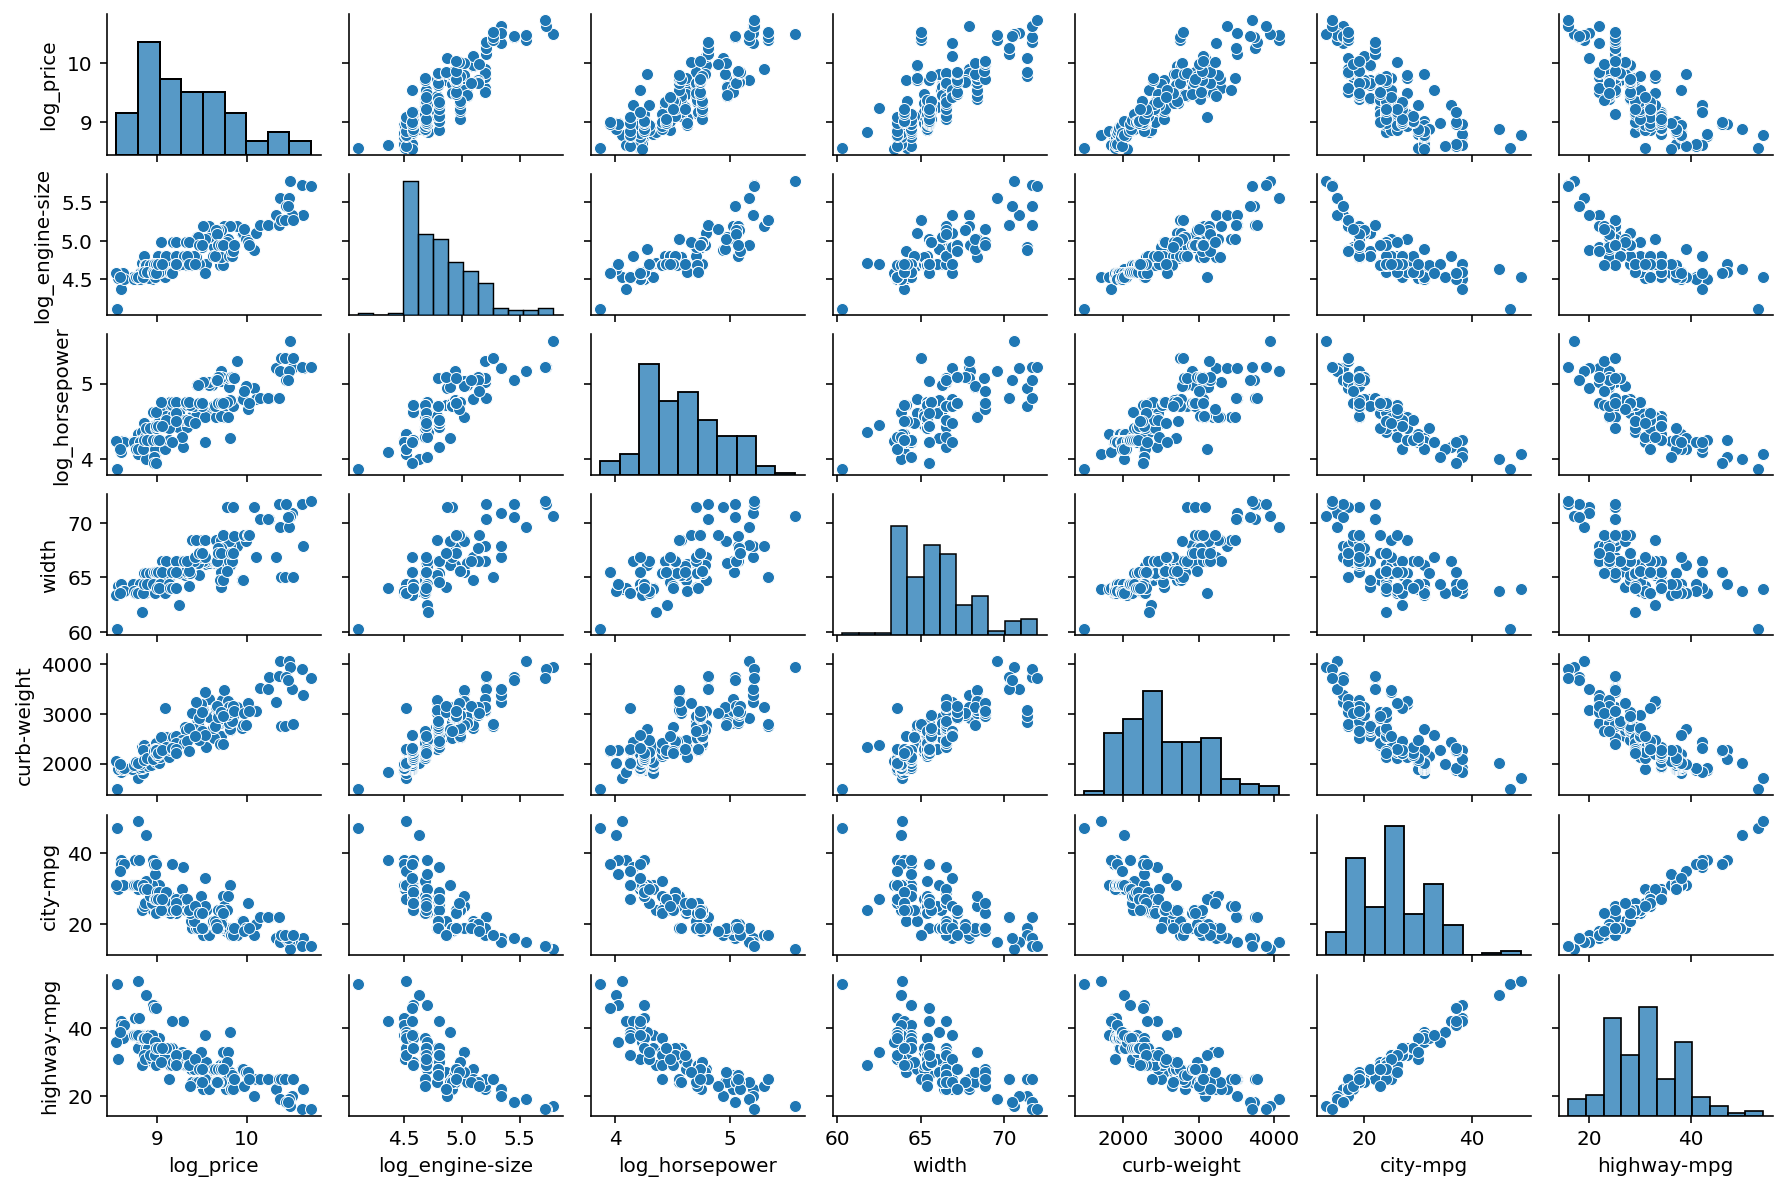

In [63]:
#insert 15
sns.pairplot(log_df, height = 1.2, aspect=1.5)

16.Run a linear regression on this transformed dataset, using log_price as your target variable, Did your R^2 improve by transforming the data?

In [64]:
#insert 16
x = log_df.drop(columns='log_price')
y = log_df['log_price']

model = LinearRegression()
model.fit(x, y)
print('R-squared', model.score(x,y))
print(f"Adjusted R^2: {1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)}")

R-squared 0.8684328592120703
Adjusted R^2: 0.8642114536252917
